In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import mglearn

In [2]:
X, y = make_blobs(random_state=1)

In [3]:
X.shape, y.shape

((100, 2), (100,))

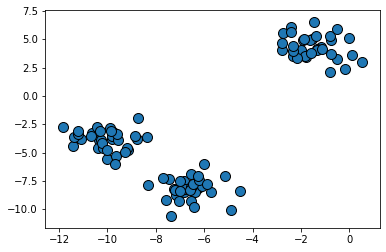

In [4]:
mglearn.discrete_scatter(X[:,0], X[:,1]) # 일반 데이터

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

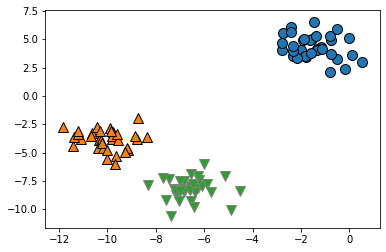

In [6]:
mglearn.discrete_scatter(X[:,0], X[:,1],y) # 실제 라벨링된 데이터

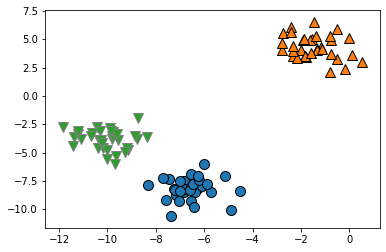

In [7]:
mglearn.discrete_scatter(X[:,0], X[:,1],kmeans.labels_) # kmeans 예측

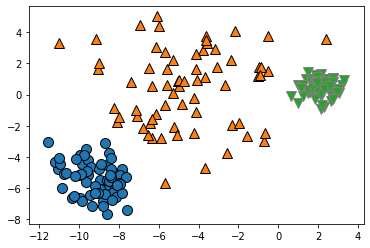

In [8]:
X, y = make_blobs(n_samples=200, random_state=170,
                 cluster_std=[1, 2.5, 0.5]) 
mglearn.discrete_scatter(X[:,0],X[:,1],y) # 밀도를 다르게해서 실제 라벨링한 된 데이터

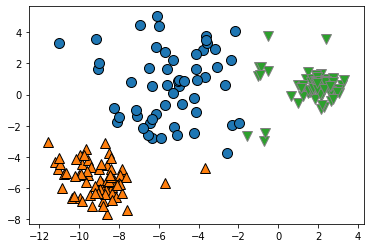

In [9]:
y_pred = KMeans(n_clusters=3).fit_predict(X)
mglearn.discrete_scatter(X[:,0],X[:,1],y_pred) # kmeans 예측

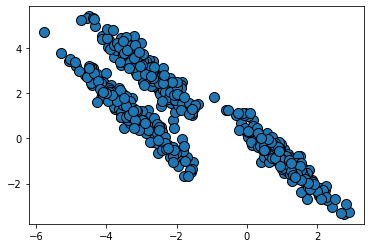

In [10]:
import numpy as np
X,y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
transformation = rng.normal(size=(2,2))
X=np.dot(X,transformation)
mglearn.discrete_scatter(X[:,0],X[:,1])

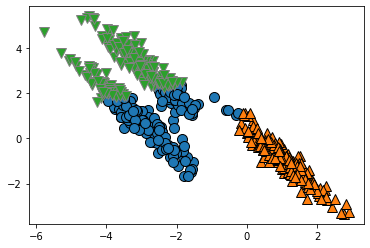

In [11]:
kmeans = KMeans(n_clusters=3).fit(X)
y_pred = kmeans.predict(X)
mglearn.discrete_scatter(X[:,0],X[:,1],y_pred)


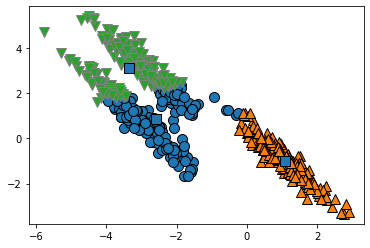

In [12]:
kmeans = KMeans(n_clusters=3).fit(X)
y_pred = kmeans.predict(X)
mglearn.discrete_scatter(X[:,0],X[:,1],y_pred)
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],
                         kmeans.cluster_centers_[:,1],
                        markers='s')

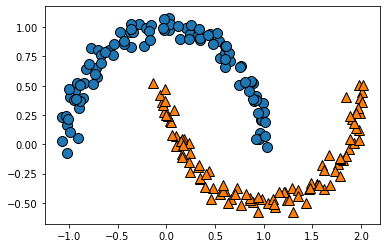

In [13]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

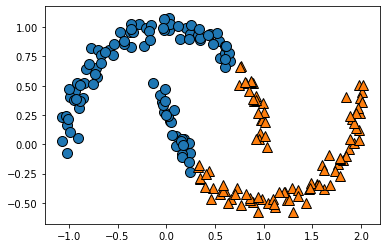

In [14]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)
model = KMeans(n_clusters=2).fit(X)
y_ = model.predict(X)
mglearn.discrete_scatter(X[:,0],X[:,1],y_)

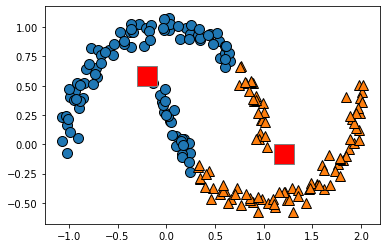

In [15]:
mglearn.discrete_scatter(X[:,0],X[:,1],y_)
mglearn.discrete_scatter(model.cluster_centers_[:,0],
                         model.cluster_centers_[:,1],
                        markers='s', s='20', c='r')

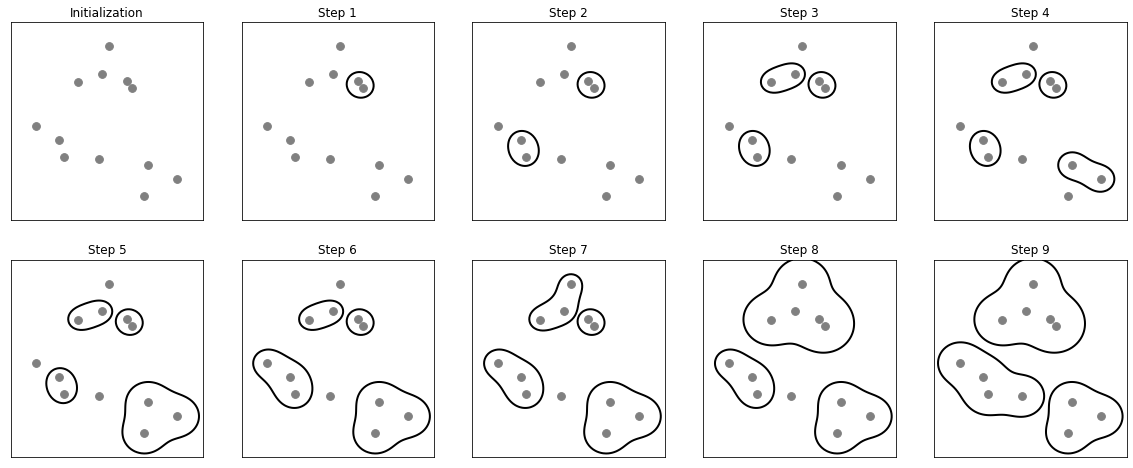

In [16]:
mglearn.plots.plot_agglomerative_algorithm()

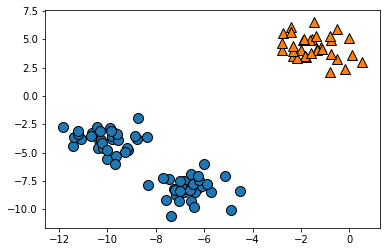

In [17]:
from sklearn.cluster import AgglomerativeClustering
X,y = make_blobs(random_state=1)
agg_model = AgglomerativeClustering()
y_ = agg_model.fit_predict(X)
mglearn.discrete_scatter(X[:,0],X[:,1],y_)

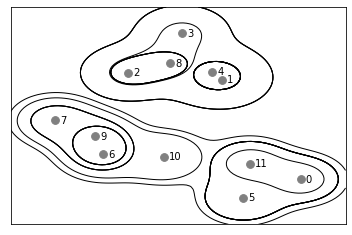

In [18]:
mglearn.plots.plot_agglomerative()

In [19]:
from sklearn.cluster import DBSCAN

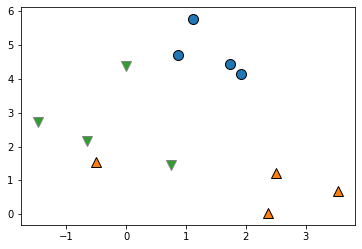

In [20]:
X, y = make_blobs(random_state = 0, n_samples=12)
mglearn.discrete_scatter(X[:,0],X[:,1], y)

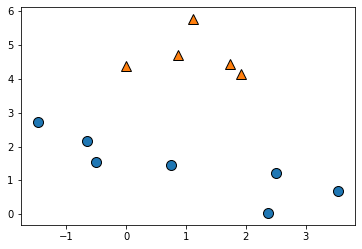

In [21]:
dbscan =DBSCAN(eps=1.2)
y_ = dbscan.fit_predict(X)
mglearn.discrete_scatter(X[:,0],X[:,1], y_)

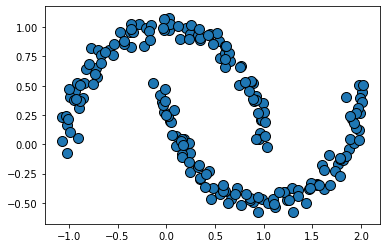

In [22]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_ = scaler.transform(X)
dbscan = DBSCAN(eps=0.05)
y_ = dbscan.fit_predict(X_)
mglearn.discrete_scatter(X[:,0],X[:,1], y_)
import matplotlib.pyplot as plt; plt.show()

# 노랑책 365쪽 7장 텍스트 데이터

In [23]:
import pandas as pd
import math

In [24]:
retail_df = pd.read_excel('Online Retail.xlsx')
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [25]:
retail_df.shape

(541909, 8)

In [26]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [27]:
#오류 데이터 정제
retail_df = retail_df[retail_df['Quantity']>0]
retail_df = retail_df[retail_df['UnitPrice']>0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]

In [28]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [29]:
# CustomerID 자료형을 정수형으로 변환
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [30]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [31]:
print(retail_df.isnull().sum())
print(retail_df.shape)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
(397884, 8)


In [32]:
#중복 레코드 제거
retail_df.drop_duplicates(inplace = True)
print(retail_df.shape)

(392692, 8)


In [33]:
pd.DataFrame([{'Product':len(retail_df['StockCode'].value_counts()),
              'Transaction':len(retail_df['InvoiceNo'].value_counts()),
              'Customer':len(retail_df['CustomerID'].value_counts())}],columns=['Product','Transaction','Customer'],index=['counts'])

,Product,Transaction,Customer
counts,3665,18532,4338


In [34]:
retail_df['Country'].value_counts()

United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

In [35]:
# 주문 금액 컬럼 추가
retail_df['SaleAmount'] = retail_df['UnitPrice']*retail_df['Quantity']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [36]:
aggregations = {
    'InvoiceNo':'count',
    'SaleAmount' : 'sum',
    'InvoiceDate' :'max'
}

customer_df = retail_df.groupby('CustomerID').agg(aggregations)
customer_df = customer_df.reset_index()
customer_df.head()

,CustomerID,InvoiceNo,SaleAmount,InvoiceDate
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [37]:
customer_df = customer_df.rename(columns = {'InvoiceNo':'Freq',
                                           'InvoiceDate':'ElapsedDays'})
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [38]:
import datetime
customer_df['ElapsedDays'] = datetime.datetime(2011,12,10) - customer_df['ElapsedDays']
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,325 days 13:59:00
1,12347,182,4310.00,2 days 08:08:00
2,12348,31,1797.24,75 days 10:47:00
3,12349,73,1757.55,18 days 14:09:00
4,12350,17,334.40,310 days 07:59:00


In [39]:
customer_df['ElapsedDays'] = customer_df['ElapsedDays'].apply(lambda x : x.days+1)
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,326
1,12347,182,4310.00,3
2,12348,31,1797.24,76
3,12349,73,1757.55,19
4,12350,17,334.40,311


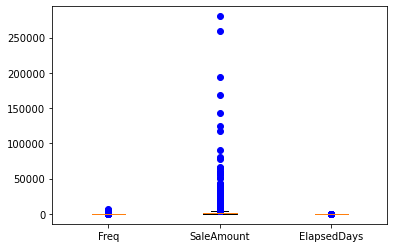

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq'],customer_df['SaleAmount'],customer_df['ElapsedDays']],sym = 'bo')
plt.xticks([1,2,3], ['Freq','SaleAmount','ElapsedDays'])
plt.show()

In [41]:
customer_df.columns

Index(['CustomerID', 'Freq', 'SaleAmount', 'ElapsedDays'], dtype='object')

In [42]:
import numpy as np
customer_df['Freq_log'] = np.log1p(customer_df['Freq'])
customer_df['SaleAmount_log'] = np.log1p(customer_df['SaleAmount'])
customer_df['ElapsedDays_log'] = np.log1p(customer_df['ElapsedDays'])
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log
0,12346,1,77183.60,326,0.693147,11.253955,5.789960
1,12347,182,4310.00,3,5.209486,8.368925,1.386294
2,12348,31,1797.24,76,3.465736,7.494564,4.343805
3,12349,73,1757.55,19,4.304065,7.472245,2.995732
4,12350,17,334.40,311,2.890372,5.815324,5.743003


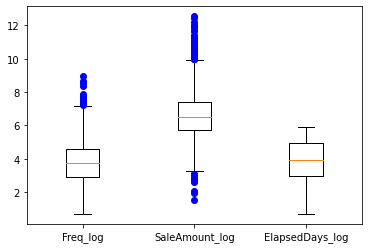

In [43]:
fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq_log'],customer_df['SaleAmount_log'],
           customer_df['ElapsedDays_log']],sym = 'bo')
plt.xticks([1,2,3], ['Freq_log','SaleAmount_log','ElapsedDays_log'])
plt.show()

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

In [45]:
X_features = customer_df[['Freq_log','SaleAmount_log','ElapsedDays_log']].values

In [46]:
from sklearn.preprocessing import StandardScaler
X_features_scaled = StandardScaler().fit_transform(X_features)

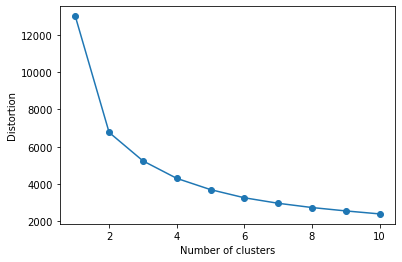

In [49]:
distortions = []
for i in range(1,11):
    kmeans_i = KMeans(n_clusters = i, random_state = 0) # 모델 생성
    kmeans_i.fit(X_features_scaled)
    distortions.append(kmeans_i.inertia_)
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [50]:
kmeans = KMeans(n_clusters=3,random_state=0)
Y_labels= kmeans.fit_predict(X_features_scaled)

In [51]:
customer_df['ClusterLabel'] = Y_labels

In [52]:
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,326,0.693147,11.253955,5.789960,0
1,12347,182,4310.00,3,5.209486,8.368925,1.386294,2
2,12348,31,1797.24,76,3.465736,7.494564,4.343805,0
3,12349,73,1757.55,19,4.304065,7.472245,2.995732,0
4,12350,17,334.40,311,2.890372,5.815324,5.743003,1


In [53]:
from matplotlib import cm

In [76]:
def silhouetteViz(n_cluster, X_features):
    kmeans=KMeans(n_clusters = n_cluster,random_state = 0)
    Y_labels = kmeans.fit_predict(X_features)
    
    silhouette_values = silhouette_samples(X_features,Y_labels,
                                          metric='euclidean')
    y_ax_lower, y_ax_upper = 0,0
    y_ticks=[]
    
    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_labels == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c)/n_cluster)
        plt.barh(range(y_ax_lower,y_ax_upper),c_silhouettes,height=1.0,edgecolor = 'none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper)/2.)
        y_ax_lower += len(c_silhouettes)
        
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg,color = 'red',linestyle = '--')
    plt.title('Number of Cluster : '+ str(n_cluster)+'\n'+'Silhouette Score :'+str(round(silhouette_avg,3)))
    plt.yticks(y_ticks,range(n_cluster))
    plt.xticks([0,0.2,0.4,0.6,0.8,1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

In [77]:
def clusterScatter(n_cluster,X_features):
    c_colors = []
    kmeans = KMeans(n_clusters = n_cluster, random_state = 0)
    Y_labels = kmeans.fit_predict(X_features)
    
    for i in range(n_cluster):
        c_color = cm.jet(float(i)/n_cluster) # 클러스터의 색상 결정
        c_colors.append(c_color)
        #클러스터의 데이터 분포를 동그라미로 시각화
        plt.scatter(X_features[Y_labels==i,0],X_features[Y_labels==i,1],marker='o',color=c_color,edgecolor='black',s = 50,label = 'cluster'+str(i))
    #각 클러스터의 중심점을 삼각형으로 표시
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0],kmeans.cluster_centers_[i,1],marker='^',color = c_colors[i],edgecolor='w',s=200)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

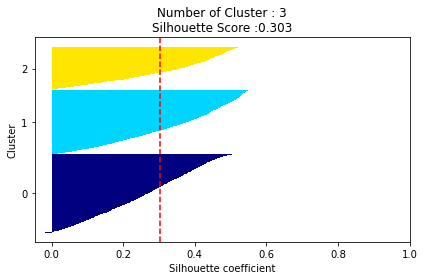

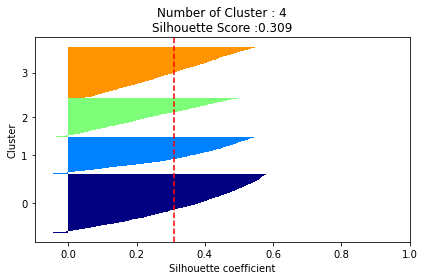

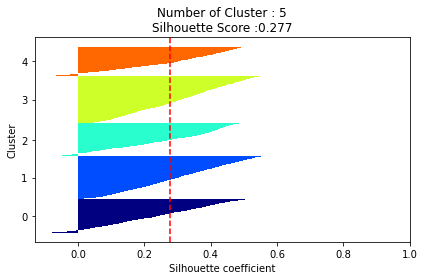

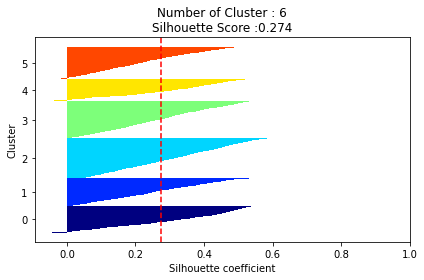

In [78]:
silhouetteViz(3,X_features_scaled)
silhouetteViz(4,X_features_scaled)
silhouetteViz(5,X_features_scaled)
silhouetteViz(6,X_features_scaled)

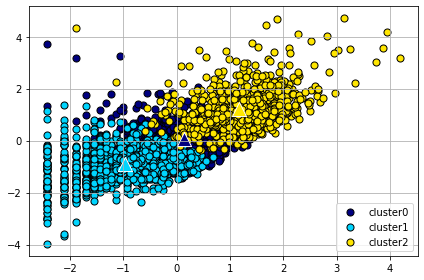

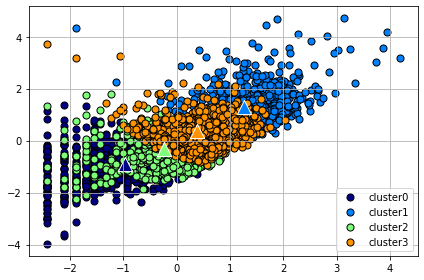

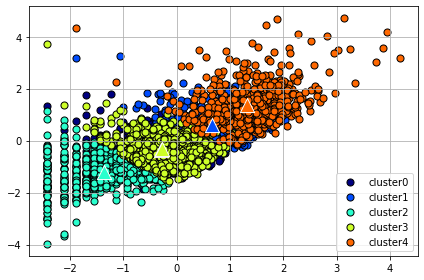

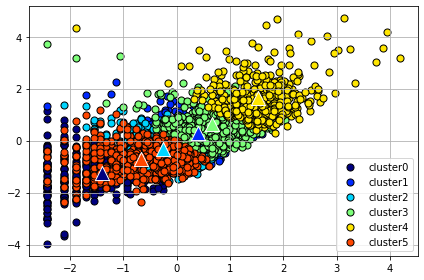

In [79]:
clusterScatter(3,X_features_scaled)
clusterScatter(4,X_features_scaled)
clusterScatter(5,X_features_scaled)
clusterScatter(6,X_features_scaled)

In [80]:
best_cluster = 4
kmeans = KMeans(n_clusters=best_cluster,random_state=0)
Y_labels = kmeans.fit_predict(X_features_scaled)

In [81]:
customer_df['ClusterLabel']= Y_labels
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,326,0.693147,11.253955,5.789960,3
1,12347,182,4310.00,3,5.209486,8.368925,1.386294,1
2,12348,31,1797.24,76,3.465736,7.494564,4.343805,3
3,12349,73,1757.55,19,4.304065,7.472245,2.995732,3
4,12350,17,334.40,311,2.890372,5.815324,5.743003,0


In [83]:
customer_df.to_csv('Online_Retail_Customer_Cluster.csv')

In [84]:
customer_df.groupby('ClusterLabel')['CustomerID'].count()

ClusterLabel
0    1370
1     868
2     893
3    1207
Name: CustomerID, dtype: int64

In [85]:
customer_cluster_df = customer_df.drop(['Freq_log','SaleAmount_log',
                                       'ElapsedDays_log'],axis=1, inplace=False)

In [86]:
#주문 1회당 평균 구매금액 : SaleAmountAvg
customer_cluster_df['SaleAmountAvg'] = customer_cluster_df['SaleAmount']/customer_cluster_df['Freq']
customer_cluster_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,ClusterLabel,SaleAmountAvg
0,12346,1,77183.60,326,3,77183.600000
1,12347,182,4310.00,3,1,23.681319
2,12348,31,1797.24,76,3,57.975484
3,12349,73,1757.55,19,3,24.076027
4,12350,17,334.40,311,0,19.670588


In [87]:
customer_cluster_df.drop(['CustomerID'],axis=1,inplace=False).groupby(['ClusterLabel']).mean()

,Freq,SaleAmount,ElapsedDays,SaleAmountAvg
ClusterLabel,,,,
0,15.100000,298.966147,188.241606,43.290636
1,279.207373,7031.952834,13.479263,96.921011
2,37.793953,603.425354,20.959686,32.226856
3,79.455675,1520.324252,95.595692,103.086284
